### Problem Statement :- Predict the Sales prices 

### in this third file i will be testing out possible variations in file 1,2 i tested out 2 different algorithms where i have been using linear regression and random forest regressor to see how things work and proceed forward , i need to be capable enough to go the atom of the topic and proceed to next 

In [4]:
import pandas as pd # calling out the packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np 
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

--------------------------------------------------------------------

### Data science Stage 2 :- Data Collection ( stage 1 is understanding the problem / need / requirement )  in this the data collection is from the kaggle repository under the competition tab where u get the training and testing dataset.( in the next project i would be calling it from my postgresql server to store and call the data and use it so that it doesnt get lost in the process), 

In [5]:
train_data = pd.read_csv("train.csv")

train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
test_data = pd.read_csv("test.csv")

test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


------------------------------------------------------------------------------------------


### Data Science Stage 3 :- Data cleaning  ---> 

### For future reference as to what data cleaning is all about 

0. Identify dupes , missing values , outliers from the look of the data and get towards the following steps
1. Handling duplicates 
2. Handling missing values 
3. Identifying and handling outliers 
4. Ensuring data type consistency 
5. Correcting Invalid / Illogical Values
6. Standardizing the text / typing errors in the categorical data , fix trail spaces etc 

In [7]:
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())

# there are no duplicated values in this dataset lets proceed forward 

0
0


### we are done with substage 1,4,5,6 of data cleaning , now proceeding forward with substage 2 of datacleaning 

In [8]:
for col in train_data.columns: # imputation method for train dataset
    if train_data[col].dtype in ['int64','float64']:
        train_data[col] = train_data[col].fillna(train_data[col].median())
    else:
        train_data[col] = train_data[col].fillna(train_data[col].mode()[0])

In [9]:
for col in test_data.columns:# imputation method for test dataset 
    if test_data[col].dtype in ['int64','float64']:
        test_data[col] = test_data[col].fillna(test_data[col].median())
    else:
        test_data[col] = test_data[col].fillna(test_data[col].mode()[0])
        

### substage 3 of data cleaning:- Handling Outliers


In [10]:
## before we begin understanding about our outliers , we need to see our data description 
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Observations
### 1 . The average condition of houses in iowa is 5 with the average quality of 6 and the average year at which the houses were built was 1971 and the average year of remodeling was in 1984 with average houses sold in the year of 2007 in the month of august with a average sale price of 180k$
### 2 . The minimum amount sales done in iowa was in the the 2006 , with lowest sale record going in the month of jan , the oldest house built in iowa was in 1872 & oldest remodelling done was in 1950 , the lowest sale is 34k$
### 3. The lowest overall condition is 1 , with lowest quality at 1 , while the highest condition is at 9 and highest overall condition is at 10 , the most recent house built was in year 2010 with the latest remodelling done in 2010 , while the highest selling house was worth money 755,000 $ 
### therefore these are primary observations i could draw , and there are factors that depeict the price of the sale now lets look towards the features 

In [11]:
print(train_data.dtypes.value_counts())

nume = train_data.select_dtypes(include=[np.number]).columns 
print(len(nume))

object     43
int64      35
float64     3
Name: count, dtype: int64
38


In [12]:
nume.tolist()

train_data[nume].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### will be caluculating the iqr  bounds and count outliers for each numerical column(nume)

In [13]:
def detect_outliers(train_data,column):
    q1= train_data[column].quantile(0.25)
    q3=train_data[column].quantile(0.75)
    IQR = q3 - q1 
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    outliers = train_data[(train_data[column] < lower_bound) | (train_data[column] >upper_bound)][column]
    return len(outliers),lower_bound,upper_bound

outlier_summary = {}
for col in nume:
    count,lower,upper = detect_outliers(train_data,col)
    outlier_summary[col] = {'outlier_count':count,'Lower_bound':lower ,'Upper_bound':upper}

outlier_df = pd.DataFrame(outlier_summary).T 
outlier_df = outlier_df.sort_values("outlier_count", ascending = False)
print(outlier_df.head(10))
print("cols with outliers : ",len(outlier_df[outlier_df['outlier_count']>0]))
print("max outliers in a column : ", outlier_df['outlier_count'].max())
print("percentage of outliers in top columns:",(outlier_df['outlier_count'].max() / train_data.shape[0]) * 100, "%")

               outlier_count  Lower_bound  Upper_bound
EnclosedPorch          208.0        0.000        0.000
BsmtFinSF2             167.0        0.000        0.000
OverallCond            125.0        3.500        7.500
ScreenPorch            116.0        0.000        0.000
LotFrontage            106.0       31.500      107.500
MSSubClass             103.0      -55.000      145.000
MasVnrArea              98.0     -246.375      410.625
BsmtHalfBath            82.0        0.000        0.000
OpenPorchSF             77.0     -102.000      170.000
LotArea                 69.0     1481.500    17673.500
cols with outliers :  32
max outliers in a column :  208.0
percentage of outliers in top columns: 14.246575342465754 %


### we are contextualizing what we found out here in the stage one of understanding our outliers which shows us that out of 38 columns 32 are with outliers , and the top being in enclosed porch with 208 outliers thats huge. 

### Given we are done with identifying the outliers , lets visualize ( this being the stage 2 of outliers)

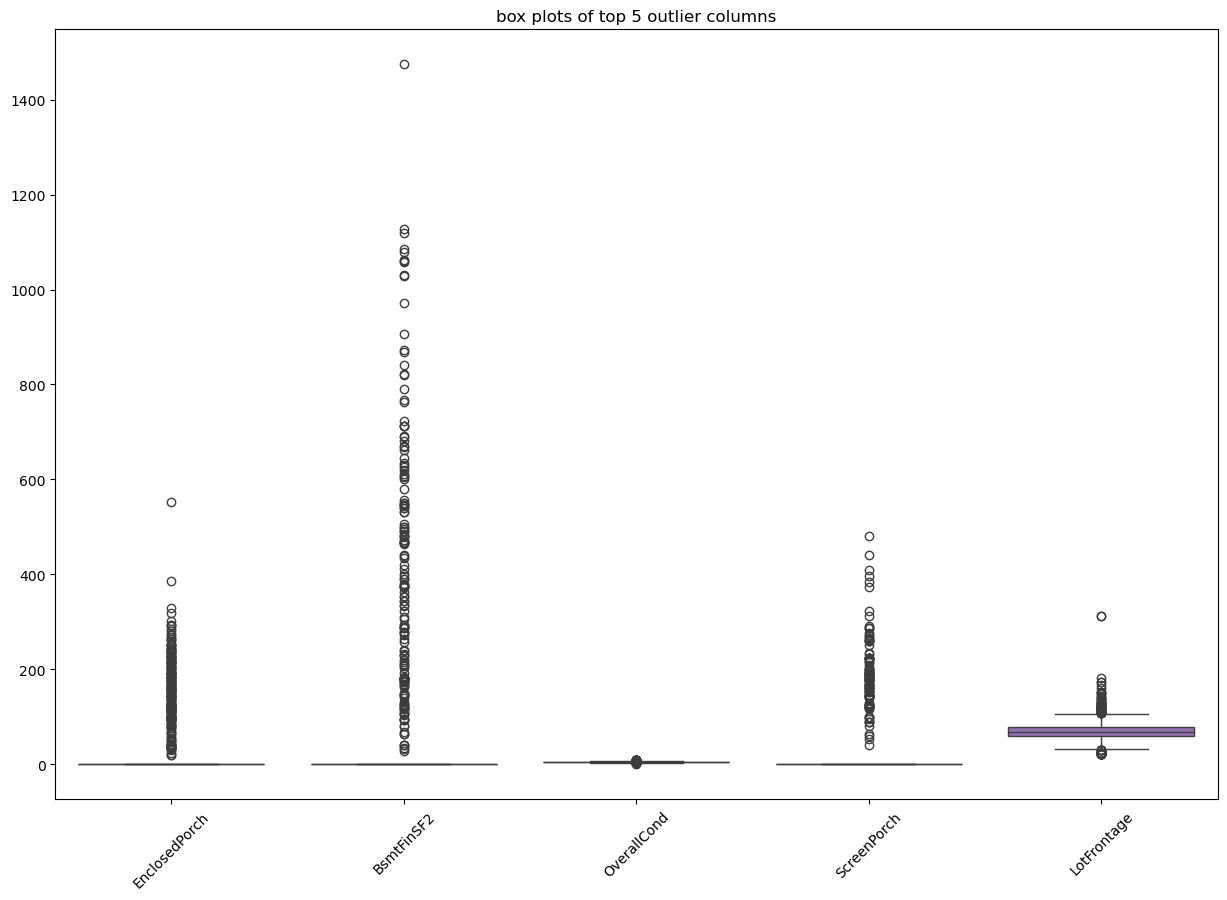

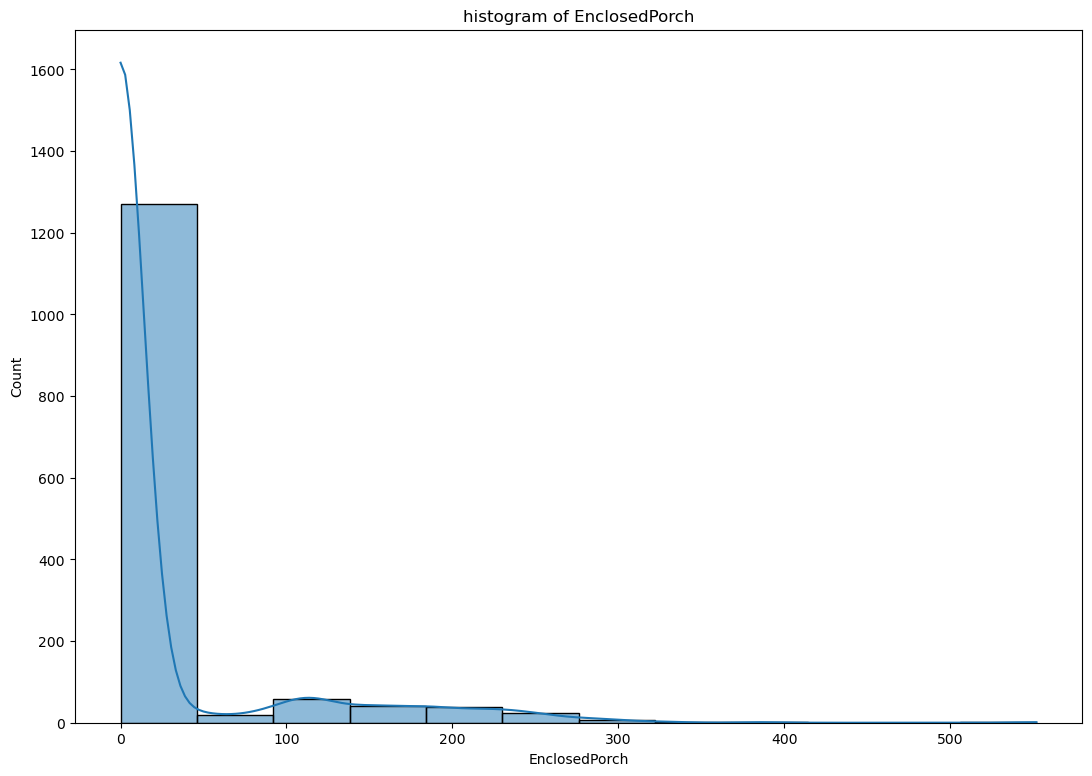

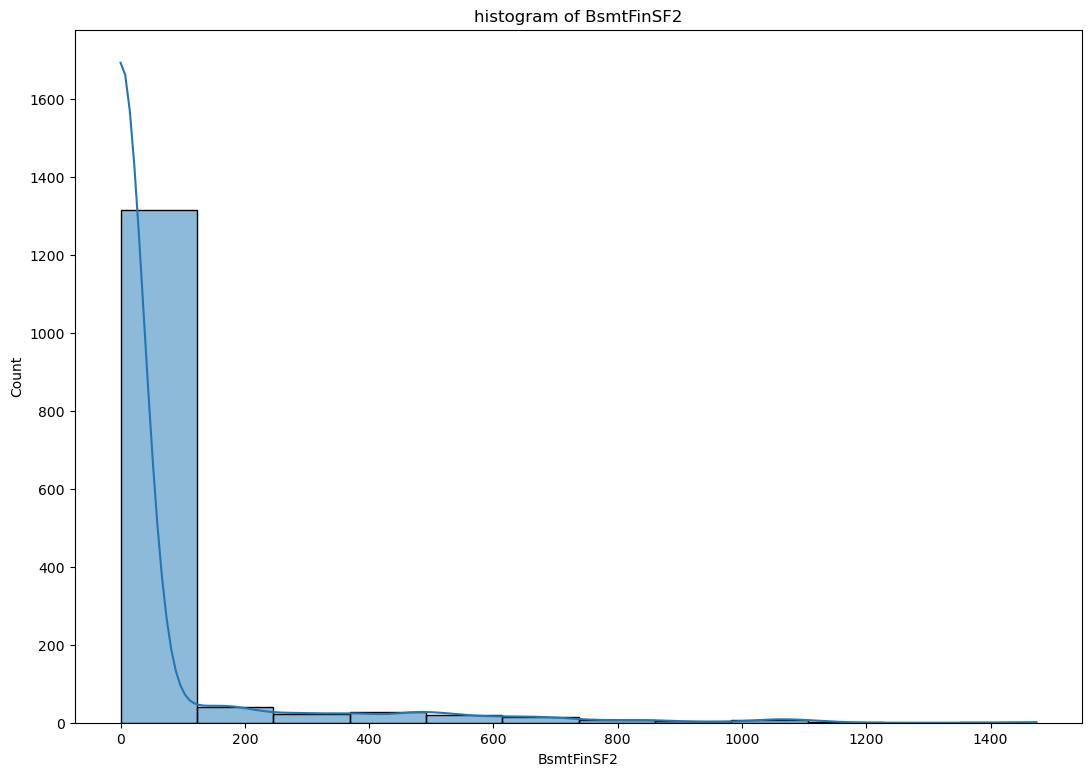

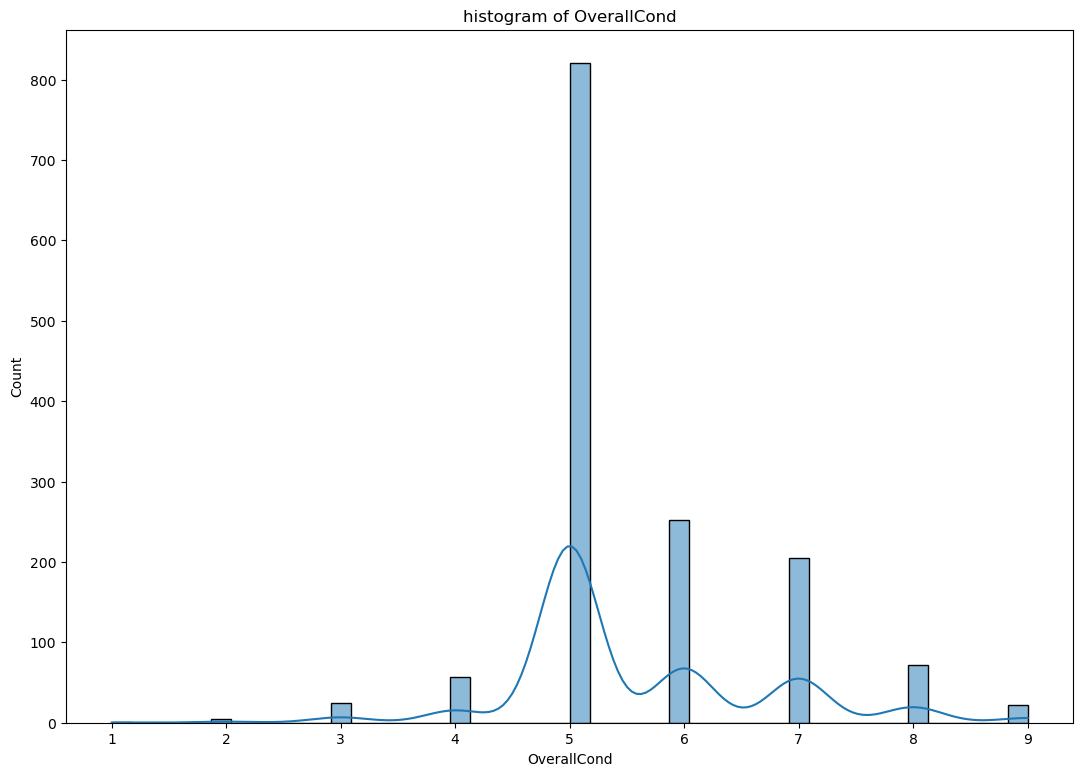

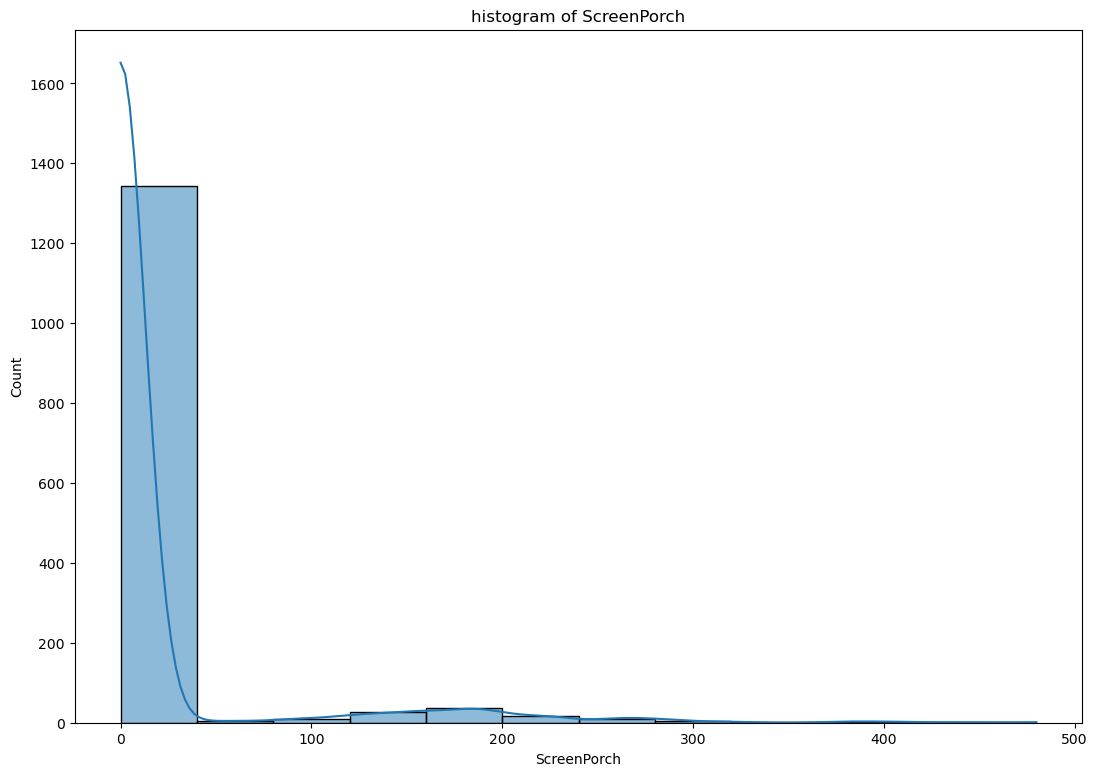

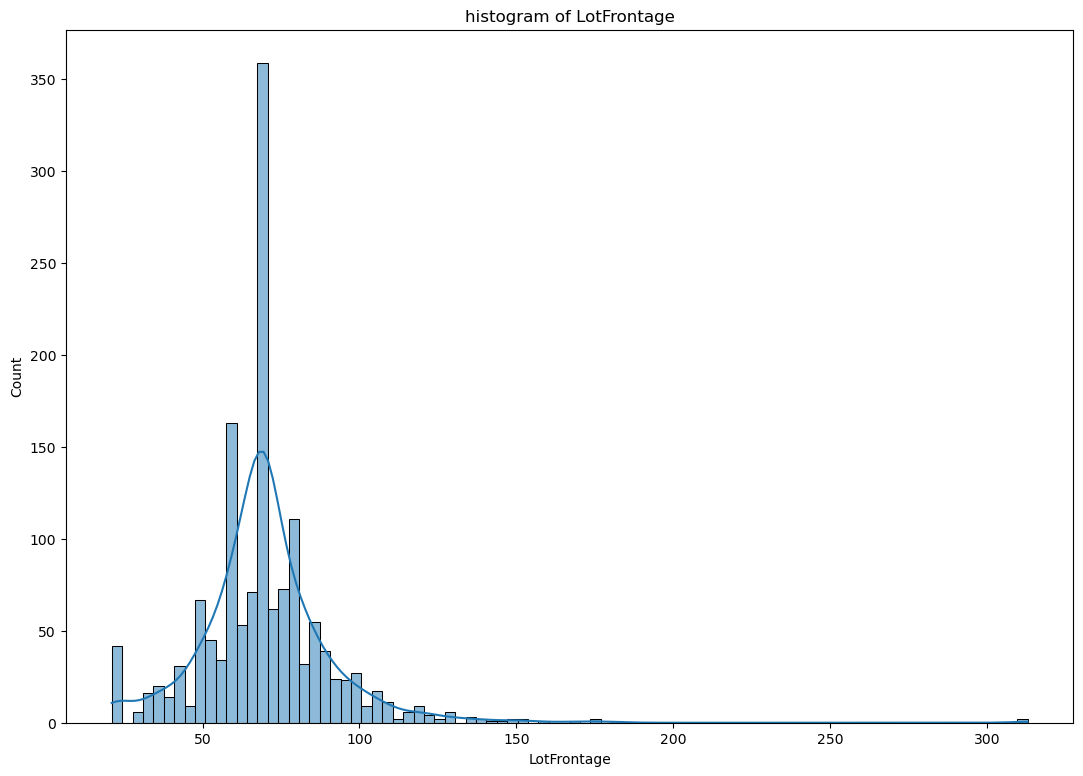

In [14]:
top_outliers = outlier_df.index[:5].tolist()

plt.figure(figsize=(15, 10))
sns.boxplot(data=train_data[top_outliers])
plt.title('box plots of top 5 outlier columns')
plt.xticks(rotation=45)
plt.show()

for col in top_outliers:
    plt.figure(figsize=(13, 9))
    sns.histplot(train_data[col], kde=True)
    plt.title(f'histogram of {col}')
    plt.show()

In [15]:
# quantifying how these affect the means of the columns is most important aspect of outliers 

def compare_stats(train_data,column):
    qq1= train_data[column].quantile(0.25)
    qq3=train_data[column].quantile(0.75)
    iqr = qq3 - qq1 
    lower= qq1 - 1.5 * iqr
    upper= qq3 + 1.5 * iqr
    original_mean = train_data[column].mean()
    cleaned = train_data[(train_data[column] >= lower) & (train_data[column] <= upper)] [column]
    cleaned_mean = cleaned.mean()
    return abs(original_mean - cleaned_mean) / original_mean * 100 

top_outlier_col = ['EnclosedPorch','BsmtFinSF2','OverallCond','ScreenPorch','LotFrontage']
impact_summary = {col:compare_stats(train_data, col) for col in top_outlier_col}
impact_df = pd.DataFrame.from_dict(impact_summary,orient='index' , columns=['mean_change'])
print("The Total Impact : ", impact_df)


The Total Impact :                 mean_change
EnclosedPorch   100.000000
BsmtFinSF2      100.000000
OverallCond       2.191057
ScreenPorch     100.000000
LotFrontage       1.554460


#### 1. From the given above i can conclude that the 100% mean change means that after removing outliers via iqr , the mean of the reaming data is either zero or drastically different from the original mean , the non zero values are flagged as outliers , hence cant remove them for the variables but its the highlight cause a lot of homes dont have screenporch / enclosed porch / bsmtfinshed etc.


#### 2. The overall conditioin and lotfrontage have a very small influence on the mean , from box plot as this is a rating scale , removing this wont shift the mean much 

### Ladies and Gentlemen this is by 100% sparsity issue , where the columns are sparse and as the median is 0 and any value other than zero is taken in a iqr this shows the difference and hence the 100% change  and this dataset is right skewed 

### we are done with stage of identifying the outliers , the next stage is to deal with Handling the outliers as the dataset is of 1460 rows , removing outliers wont be beneficial. 

#### 1. we can clip the values in order to have the whole dataset preserved and well for the model training. 

#### 2. we can use a ensemble method like random forest regressor as its not prone to outliers and linear regression cannot handle variables with right skewed data distribution 

In [16]:
# capping the values 
train_capped = train_data.copy()
numeric_col = train_capped.select_dtypes(include=[np.number]).columns
for col in numeric_col:
    if col != 'SalePrice':
        upper_limit = train_capped[col].quantile(0.95)
        train_capped[col] = train_capped[col].clip(upper=upper_limit)

print(train_capped.shape)

print("max values before capping (original train_data):\n " ,train_data[top_outlier_col].max())
print("max values after capping\n " ,train_capped[top_outlier_col].max())

(1460, 81)
max values before capping (original train_data):
  EnclosedPorch     552.0
BsmtFinSF2       1474.0
OverallCond         9.0
ScreenPorch       480.0
LotFrontage       313.0
dtype: float64
max values after capping
  EnclosedPorch    180.15
BsmtFinSF2       396.20
OverallCond        8.00
ScreenPorch      160.00
LotFrontage      104.00
dtype: float64


#### Beautiful , we have finally controlled our sparsity to a point as the point of origin to this outlier is caused by real world instances and the decisions that led to this can and will help me proceed forward with sales price visualization to see the distribution 

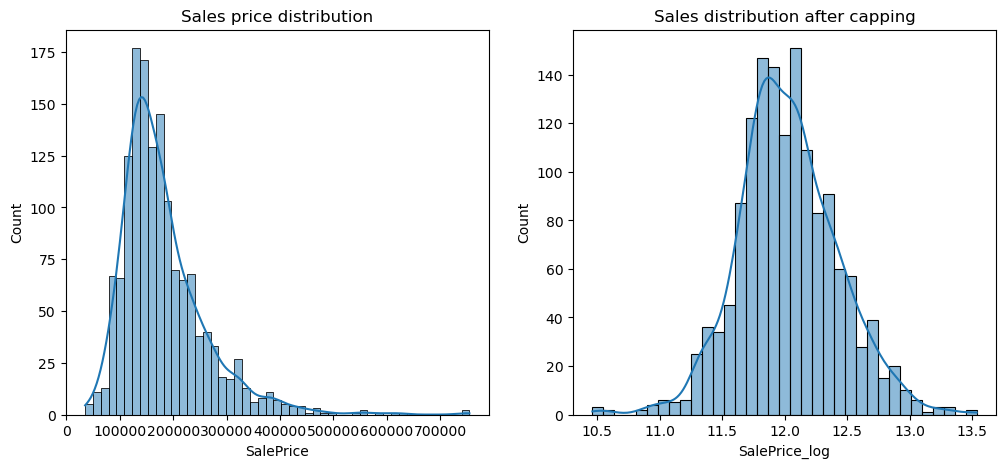

skewness of saleprice: 1.8828757597682129
skewness of saleprice_log: 0.12134661989685329


In [17]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.histplot(train_capped['SalePrice'], kde=True)
plt.title('Sales price distribution')
plt.subplot(1, 2, 2)
train_capped['SalePrice_log'] = np.log1p(train_capped['SalePrice'])
sns.histplot(train_capped['SalePrice_log'], kde=True)
plt.title("Sales distribution after capping")
plt.show()


print("skewness of saleprice:", train_capped["SalePrice"].skew())
print("skewness of saleprice_log:", train_capped["SalePrice_log"].skew())

### well we ended up getting the sale distribution fron right skewed to normai distribution 

### Data Science Stage 4 :- Data Preprocessing. 

#### i would be working with encoding in order to build towards ml model 

### Train Dataset Encoding


In [27]:
print("columns in train_capped", train_capped.columns.tolist())
print("Sale price in train_capped",'SalePrice' in train_capped.columns)
print("sale price log in train capped",'SalePrice_log' in train_capped.columns)

cat_col = train_capped.select_dtypes(include=['object']).columns
num_col = train_capped.select_dtypes(include=[np.number]).columns

enco = OneHotEncoder(sparse_output=False ,handle_unknown ='ignore')

encoded_data = enco.fit_transform(train_capped[cat_col])

encoded_columns = enco.get_feature_names_out(cat_col)

cat_encoded_data = pd.DataFrame(encoded_data,columns = encoded_columns,index = train_capped.index)

train_encoded = pd.concat([train_capped[num_col],cat_encoded_data], axis=1)

print("encoded shape:",train_encoded.shape)
print("Sale price in train_capped",'SalePrice' in train_encoded.columns)
print("sale price log in train capped",'SalePrice_log' in train_encoded.columns)


columns in train_capped ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorc

### Test Dataset Encoding

In [41]:
# capping data in test data 
test_ids = test_data['Id'].copy()
numerical_cols = test_data.select_dtypes(include=[np.number]).columns.drop('Id')
test_capped = test_data.copy()
for col in numerical_cols:
    upper_limits = test_capped[col].quantile(0.95)
    test_capped[col] = test_capped[col].clip(upper=upper_limits)

print("Test data shapped",test_capped.shape)

Test data shapped (1459, 80)


/var/folders/20/y86c17l116d1rg_932q1sg8h0000gn/T/ipykernel_19213/1209990993.py:7: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_capped[col] = test_capped[col].clip(upper=upper_limits)


In [37]:
cate_col = test_capped.select_dtypes(include=['object']).columns
encoded_cate = enco.transform(test_capped[cate_col])
encoded_caten = enco.get_feature_names_out(cate_col)
encoded_cate_df = pd.DataFrame(encoded_cate, columns=encoded_caten , index=test_data.index)

numerical_cols_no = numerical_cols
test_encoded = pd.concat([test_capped[numerical_cols_no], encoded_cate_df], axis=1)

print("test data shape",test_encoded.shape)

test data shape (1459, 287)


In [28]:
x = train_encoded.drop(columns=['SalePrice','SalePrice_log'])
y = train_encoded['SalePrice_log']

print(x.shape)
print(y.shape)

(1460, 288)
(1460,)


### Data Science Stage 5 :- Model Building (training a ml model is done at this stage after going through all of the work till eda ( data cleaning , data preprocessing and understanding things about data in general is called exploratory data analysis ( eda ))). 

In [48]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =42)

model = RandomForestRegressor(n_estimators=150 , max_depth=10, random_state=42 , min_samples_split=5)

model.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=150,
                      random_state=42)

In [49]:
y_pred = model.predict(x_test)

y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

print("in log scale the mean absolute error is : ", mean_absolute_error(y_test,y_pred))
print("in log scale the mean squared error is : ", mean_squared_error(y_test,y_pred))

mae = mean_absolute_error(y_test_exp,y_pred_exp)
mse = mean_squared_error(y_test_exp,y_pred_exp)
r = r2_score(y_test_exp,y_pred_exp)
rmsle = np.sqrt(mean_squared_error(y_test_exp,y_pred_exp))

print(f"Mean absolute error : {mae:.2f}")
print(f"Mean Squared Error : {mse:.2f}")
print(f"r2 : {r:.2f}")
print("the root mean squared error is :",rmsle)

in log scale the mean absolute error is :  0.10017241381915916
in log scale the mean squared error is :  0.021424948484906864
Mean absolute error : 18027.76
Mean Squared Error : 952412930.50
r2 : 0.88
the root mean squared error is : 30861.18809285154


## Results :- 

### In Log Scale Metrics :- 

#### 1. The absolute error is small , and the model predictions are close to actualy values.
#### 2. The mean squared error is also small indicating that the error which get penalized by larger errors more in caluculation is less 


### Original Metrics :- 

#### 1. The model is off by $18,027 which on a average is reasonable when people are looking to buy a house 
#### 2. The r2 of 0.88 tells that the model is able to answer 88% of varaince  in SalePrice

## Testing out my model accuracy 

In [50]:
train_cols = x.columns

missing_cols = set(train_cols) - set(test_encoded.columns)
for cols in missing_cols:
    test_encoded[cols] = 0 

test_encoded = test_encoded[train_cols]

print(test_encoded.shape)

(1459, 288)


In [51]:
test_pred_log = model.predict(test_encoded)

test_pred = np.expm1(test_pred_log)
print("first 5 predictions",test_pred[:5])

first 5 predictions [126061.86259102 153312.44317173 182077.51348065 183970.52362588
 200873.68842734]


In [52]:
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice' : test_pred
})

submission.to_csv("submission5.csv", index=False)
print("sub file created")

sub file created


## Feature Importance analysis ( this is important inorder to understand what is exactly contributing towards the prices of sales of houses in iowa )

top 10 important features :
              feature  importances
4         OverallQual     0.541865
16          GrLivArea     0.116156
12        TotalBsmtSF     0.042668
26         GarageCars     0.040675
27         GarageArea     0.025889
13           1stFlrSF     0.021392
9          BsmtFinSF1     0.019797
3             LotArea     0.015049
6           YearBuilt     0.013979
248  GarageFinish_Unf     0.010697


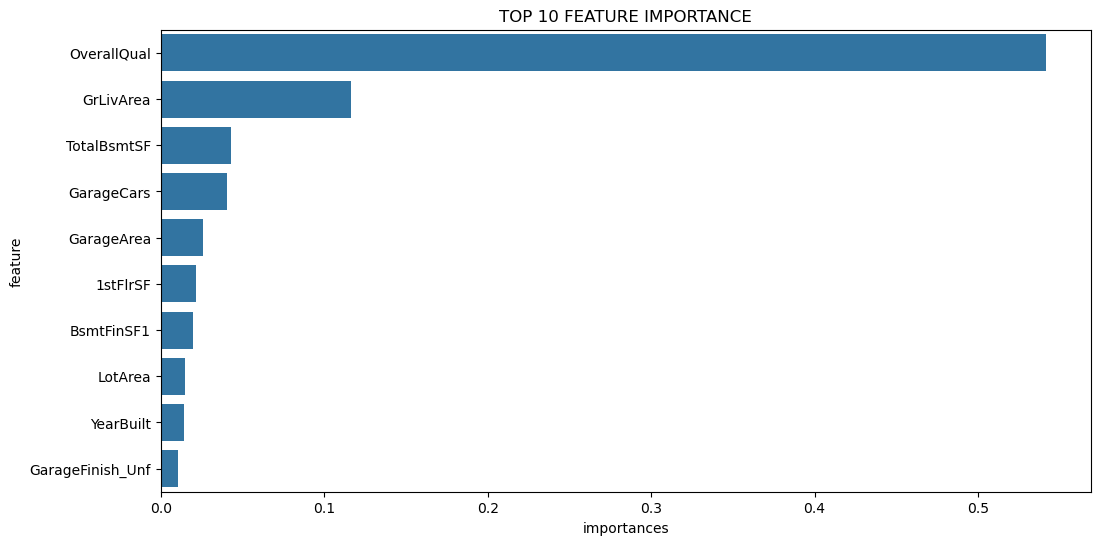

In [53]:
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': x.columns,'importances': importances})
print("top 10 important features :")
print(feature_importances.sort_values('importances', ascending=False).head(10))

plt.figure(figsize=(12, 6))
sns.barplot(x='importances',y='feature', data=feature_importances.sort_values('importances', ascending=False).head(10))
plt.title("TOP 10 FEATURE IMPORTANCE")
plt.show()

### From the given feature importance list i am able to see that 

#### 1. Overall Quality & GrLiveArea play a major role in Sale Price prediction to improve our model we can remove everything below 0.1 in the graph 

#### therefore removing year built , 1st floor square feet etc will reduce noise in my dataset and give us better accuracy but that aside this is indepth analysis on house sales price prediction 

### Self Note :- 

### need to work with model tuning by using grid/random search cv and handle sparsity further but that aside there isnt anything left in this for me to learn , ill take a indepth look at the topics but that aside pretty much this is it , finally wrapping up the Sales Prediction